# Hierarchichal Clustering

- One advantage of the hierarchical clustering algorithm is that it allows us to plot dendro-
grams (visualizations of a binary hierarchical clustering), which can help with the interpretation of
the results by creating meaningful taxonomies. Another advantage of this hierarchical approach is
that we do not need to specify the number of clusters upfront.

- The two main approaches to hierarchical clustering are agglomerative and divisive hierarchical clus-
tering. In divisive hierarchical clustering, we start with one cluster that encompasses the complete
dataset, and we iteratively split the cluster into smaller clusters until each cluster only contains one
example. In this section, we will focus on agglomerative clustering, which takes the opposite approach.
We start with each example as an individual cluster and merge the closest pairs of clusters until only
one cluster remains.

In [16]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

## Agglomerative Clustering

Hierarchical complete linkage clustering is an iterative procedure that can be summarized by the following steps:
1. Compute a pair-wise distance matrix of all examples.
2. Represent each data point as a singleton cluster.
3. Merge the two closest clusters based on the distance between the most dissimilar (distant)
members.
4. Update the cluster linkage matrix.
5. Repeat steps 2-4 until one single cluster remains.

In [3]:
# Generating a dataframe for clustering
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)

In [4]:
df.head()

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [5]:
df.shape

(5, 3)

## Compute Euclidean Distance Matrix

In [7]:
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


We apply the complete linkage agglomeration to our clusters using the linkage function
from SciPy’s cluster.hierarchy submodule, which returns a so-called linkage matrix.

## Linkage Matrix

In [9]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.

    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.

    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.

    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of

In [10]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

In [11]:
pd.DataFrame(row_clusters, 
            columns = ['row label 1', 'row label 2', 'distance', 'no. of items in cluster.'],
            index = [f"cluster {(i +1)}" for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in cluster.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


## Visualizing results as dendogram

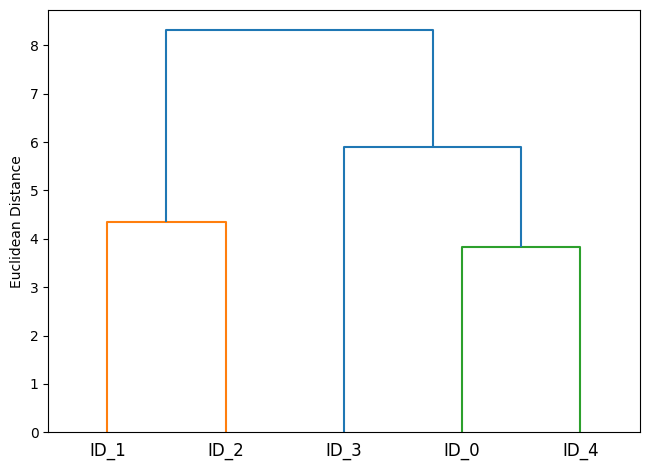

In [14]:
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

Such a dendrogram summarizes the different clusters that were formed during the agglomerative
hierarchical clustering; for example, you can see that the examples ID_0 and ID_4, followed by ID_1
and ID_2, are the most similar ones based on the Euclidean distance metric.

## Attaching dendrograms to a heat map
In practical applications, hierarchical clustering dendrograms are often used in combination with a
heat map, which allows us to represent the individual values in the data array or matrix containing
our training examples with a color code.

/var/folders/2n/_8jmmysn22sbx4zjv3c2lm980000gn/T/ipykernel_61676/3411995952.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/2n/_8jmmysn22sbx4zjv3c2lm980000gn/T/ipykernel_61676/3411995952.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


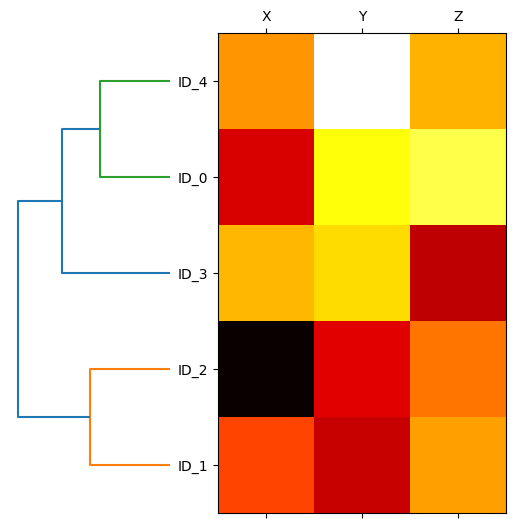

In [15]:
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

## Agglomerative clustering using scikit-learn

In [21]:
ac = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluser labels: {labels}')

Cluser labels: [1 0 0 2 1]


Looking at the predicted cluster labels, we can see that the first and the fifth examples (ID_0 and
ID_4) were assigned to one cluster (label 1), and the examples ID_1 and ID_2 were assigned to a sec-
ond cluster (label 0). The example ID_3 was put into its own cluster (label 2). Overall, the results are
consistent with the results that we observed in the dendrogram. We should note, though, that ID_3 is
more similar to ID_4 and ID_0 than to ID_1 and ID_2, as shown in the preceding dendrogram figure;
this is not clear from scikit-learn’s clustering results.